<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Andres Felipe Deulofeu Torres  <br>
Fecha: 02/06/2024

# Importación de librerias necesarias

# Parte I. Regresión

In [2]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score


from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [3]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/adeulofeu/Portfolio/main/Machine%20learning/Regression/Medical%20Cost%20Personal%20Datasets/insurance.csv'
df = pd.read_csv(url) 

## Descripción de la fuente del Dataset

Dataset: Medical Cost Personal Datasets

Descripción: Este conjunto de datos proporciona información sobre los cargos de seguros médicos y los atributos como sexo, historial de fumador, edad, región entre otras por los cuales se determina el precio de estos seguros. Este modelo podría ayudar a determinar el precio de un seguro medico teniendo cuneta las características del asegurado.

Enlace: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

Descripción del problema: Problema de regresion multivariable, se espera predecir el valor del seguro medico dependiendo a la caracteristicas de las personas

Variable objetivo: charges

Utilidad de la posible solución: El conjunto de datos permite crear un modelo que permita estimar el costo de un seguro medico para ciudadanos estadounidenses teniendo en cuenta factores asociados a su estilo de vida y no netamente a su altura y peso

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [55]:
#Código que responde a la descripción anterior
# Analisis de completitud del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Instancias totales: 1338
* Atributos de entrada:
>* age: edad - numerica discreta
>* sex: sexo - categorica nominal
>* bmi: Indice de masa corporal - numerica continua
>* children: numero de hijos - numerica discreta
>* smoker: fumador - categorica nominal
>* region: region del pais - categorica nominal
>* charges: valor del seguro medico - numerica continua

Se observa que los atributos 'sex', 'smoker' y 'region' fueron tomadas como objetos por lo cual lo convertimos en categorias

In [56]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)
# Se realiza un cambio de las varaibles tomada como object por python a categoricas
df[['sex','smoker','region']] = df[['sex','smoker','region']] .astype('category')

In [57]:
# Se recorre generan los esstadisticos basicos para conocer la distribución de las variables numericas
df[['age','bmi','children','charges']].describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
90%,59.000000,38.619500,3.000000,34831.719700
95%,62.000000,41.106000,3.000000,41181.827787
max,64.000000,53.130000,5.000000,63770.428010


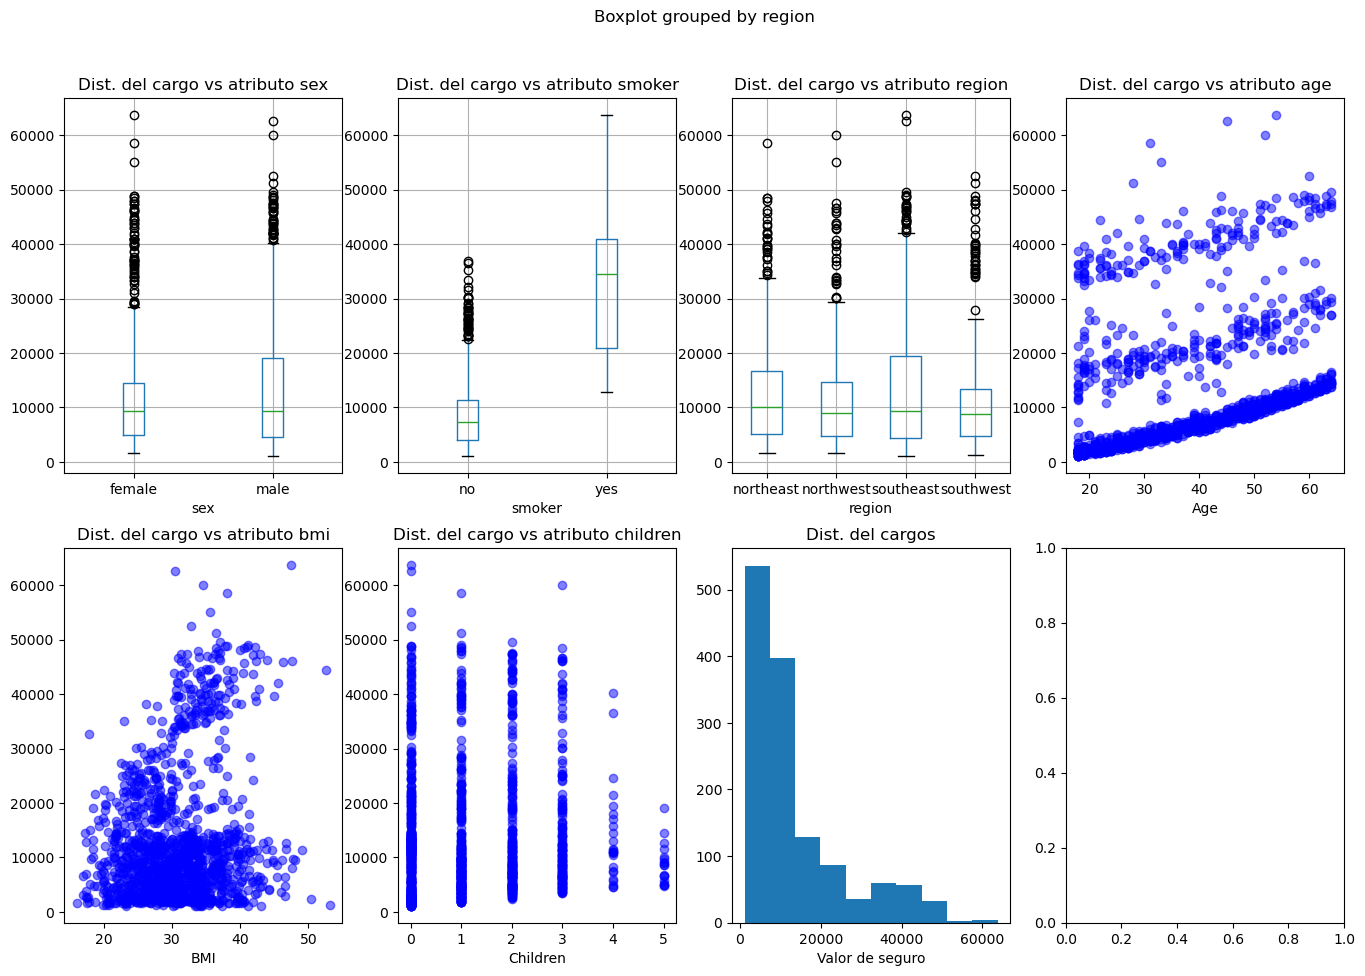

In [81]:
# Se Visualiza la distribución de cada variable con respecto a la variable objetivo
fig,ax = plt.subplots(2,4,figsize=[16,11])

df.boxplot('charges','sex',ax=ax[0,0])
ax[0,0].set_title(f'Dist. del cargo vs atributo sex')

df.boxplot('charges','smoker',ax=ax[0,1])
ax[0,1].set_title(f'Dist. del cargo vs atributo smoker')

df.boxplot('charges','region',ax=ax[0,2])
ax[0,2].set_title(f'Dist. del cargo vs atributo region')

ax[0,3].scatter(df['age'], df['charges'], color='blue', alpha=0.5)
ax[0,3].set_title(f'Dist. del cargo vs atributo age')
ax[0,3].set_xlabel('Age')

ax[1,0].scatter(df['bmi'], df['charges'], color='blue', alpha=0.5)
ax[1,0].set_title(f'Dist. del cargo vs atributo bmi')
ax[1,0].set_xlabel('BMI')

ax[1,1].scatter(df['children'], df['charges'], color='blue', alpha=0.5)
ax[1,1].set_title(f'Dist. del cargo vs atributo children')
ax[1,1].set_xlabel('Children')

ax[1,2].hist(df['charges'])
ax[1,2].set_title(f'Dist. del cargos')
ax[1,2].set_xlabel('Valor de seguro')
plt.show()

In [59]:
# Revisar correlación entre la variables numericas
df[['age','bmi','children','charges']].corr()
#df['remote_ratio'].corr(df['salary_in_usd'])

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* La variable con mayor correlación con el atributo charges es el atributo de edad aunque este valor no es tan grande 0.29 se puede ver por el grafico de dispersión que existen 3 subgrupos que presentan una clara relación lineal
* La grafica de hijos, se puede ver que existe una reducción de los valores de seguro medico al tener entre 4 y 5 niños
* La distribución de valores de seguro medico con respecto a la categoria de fumador se puede observar que eleva consideramente el valor del seguro

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [60]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
df_train = df.copy()

# Transformación de variables categoricas
lb = LabelEncoder()
df_train['sex'] = lb.fit_transform(df['sex'])
df_train['smoker'] = lb.fit_transform(df['smoker'])
df_train['region'] = lb.fit_transform(df['region'])

# Estandarización de valores numericos
scaler = StandardScaler()
df_train['age'] = scaler.fit_transform(df_train[['age']])
df_train['bmi'] = scaler.fit_transform(df_train[['bmi']])
df_train['charges'] = scaler.fit_transform(df_train[['charges']])
df_train

x = df_train.drop(columns=['charges'])
y = df_train['charges']

## División del dataset en datos de entrenamiento y datos de test 

In [61]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Creacion de division de los datos de entrenamiento y pruebas en 80 - 20 respectivamente
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=48)

## Propuesta de arquitectura de red neuronal

Describe: 

+ Capa de entrada: 6 
+ Capas intermedias: Dos capas de 20 neuronas con función de activación relu
+ Capa de salida: 1 neurona con función de activación lineal
+ Funciones de activación Se utiliza la función relu para toda la red excepto para la neurona de salida que tiene función lineal

In [62]:
# Código de la estructuración de la red
model_rna = keras.Sequential()
model_rna.add(Dense(X_train.shape[1],input_dim=X_train.shape[1] , activation='relu'))
model_rna.add(Dense(20, activation='relu'))
model_rna.add(Dense(20, activation='relu'))
model_rna.add(Dense(1, activation='linear'))

C:\Users\deuand01\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
#Código de la inspección del modelo de red
print("Model Summary:")
model_rna.summary()

Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623 (2.43 KB)

 Trainable params: 623 (2.43 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [64]:
#Código de ajuste y entrenamiento

opti = {'Adam': Adam(learning_rate=0.0005),
}

model_rna.compile(optimizer=opti['Adam'], loss="mean_squared_error",
                  metrics=['R2Score'])
                  
historial = model_rna.fit(X_train,Y_train,epochs=200,batch_size=20,validation_data=(X_test, Y_test))

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - R2Score: -0.0360 - loss: 0.8752 - val_R2Score: 0.0408 - val_loss: 1.0643
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - R2Score: 0.0546 - loss: 1.0157 - val_R2Score: 0.1041 - val_loss: 0.9941
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.1332 - loss: 0.9113 - val_R2Score: 0.1873 - val_loss: 0.9017
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.2097 - loss: 0.7334 - val_R2Score: 0.2824 - val_loss: 0.7962
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.3145 - loss: 0.6972 - val_R2Score: 0.4007 - val_loss: 0.6650
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.4192 - loss: 0.5731 - val_R2Score: 0.4949 - val_loss: 0.5605
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.5225 - loss: 0.4996 - val_R2Score: 0.5714 - val_loss: 0.4756
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.5660 - loss: 0.4223 - val_R2Score: 0.6234 - val_loss: 0.4178

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.

Las metricas de evaluación del modelo de regresión van a ser:

* Optimizador: Adam
* Learning_rate: 0.0005
* Funcion de perdida: mean_squared_error
* Metrica: R2 score

### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

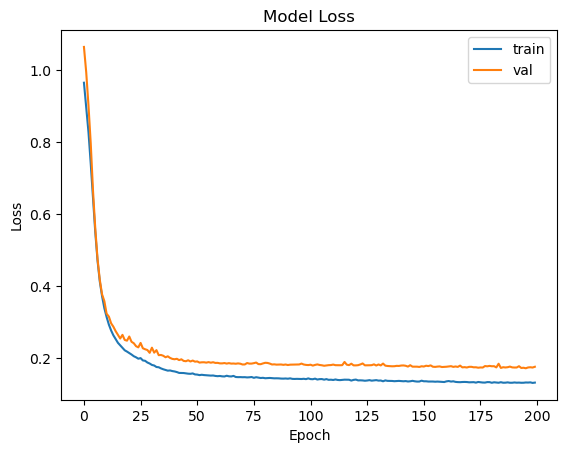

In [65]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
#Código de la inspección del modelo de red mediante la función de perdida
plt.plot(historial.history['loss'], label='train')
plt.plot(historial.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

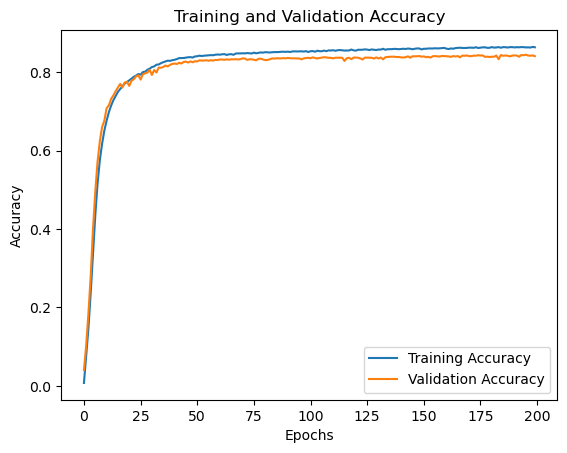

In [66]:
#Código de la inspección del modelo de red mediante la metrica de ajuste R2
accuracy = historial.history['R2Score']
val_accuracy = historial.history['val_R2Score']

plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evalúe los resultados  para el conjunto de test.

In [67]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
# Evaluación del modelo
loss, r2_pred = model_rna.evaluate(X_test, Y_test)
print("Test r2 score:", r2_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.8336 - loss: 0.1598 
Test r2 score: 0.8405768275260925


* Se puede ver que la red neuronal converge a partir del epoch 50, aunque a partir del epoch 20 se empieza a dividir las metricas del grupo de entrenamiento y el conjunto de validación por lo cual se debe tener en cuenta para saber que el modelo entro en un sobreajuste a los valores de entrenamiento
* Se obtiene un valor r2 de convergencia igual a 0.82 para el conjunto de validación lo cual es un buen valor de ajuste

## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [90]:
# Modelo de random forest regressor
# Se busca la mejor combinación de hiperparametros criterio y maxima profundidad
max_dep = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

r2 = list()
mae = list()
mse = list()
rmse = list()
cnt=0

for i in max_dep:
    model = RandomForestRegressor(max_depth=i,random_state=50)
    model.fit(X_train,Y_train)
    Y_pred_rf = model.predict(X_test)
    mae.append(mean_absolute_error(Y_test, Y_pred_rf))
    mse.append(mean_squared_error(Y_test, Y_pred_rf))
    rmse.append(np.sqrt(mse[cnt]))
    r2.append(r2_score(Y_test, Y_pred_rf)) 
    cnt = cnt+1    

mstr = pd.DataFrame()
mstr['Profundidad'] = max_dep
mstr['Mean Absolute Error'] = mae
mstr['Mean Squared Error'] = mse
mstr['Root Mean Squared Error'] = rmse
mstr['R-squared'] = r2
mstr

,Profundidad,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,1,0.502752,0.434688,0.659309,0.608233
1,2,0.276763,0.199497,0.446651,0.820201
2,3,0.239334,0.174642,0.417901,0.842602
3,4,0.230180,0.166080,0.407529,0.850319
4,5,0.232314,0.168081,0.409977,0.848515
5,6,0.237558,0.172556,0.415399,0.844482
6,7,0.242002,0.177510,0.421319,0.840018
7,8,0.248203,0.182867,0.427629,0.835189
8,9,0.251477,0.187760,0.433313,0.830779
9,10,0.254544,0.191356,0.437443,0.827538


Se puede observar en la tabla que existe un mejor ajuste r2 la profundidad optima es 4

In [92]:
# Se busca la mejor combinación de hiperparametros criterio y maxima profundidad
n_esti = [60,80,100,120,140,160,180,200,220,240,260,280]

r2 = list()
mae = list()
mse = list()
rmse = list()
cnt=0

for i in n_esti:
    model = RandomForestRegressor(n_estimators=i,random_state=50)
    model.fit(X_train,Y_train)
    Y_pred_rf = model.predict(X_test)
    mae.append(mean_absolute_error(Y_test, Y_pred_rf))
    mse.append(mean_squared_error(Y_test, Y_pred_rf))
    rmse.append(np.sqrt(mse[cnt]))
    r2.append(r2_score(Y_test, Y_pred_rf))     
    cnt = cnt+1

mstr = pd.DataFrame()
mstr['n estimators'] = n_esti
mstr['Mean Absolute Error'] = mae
mstr['Mean Squared Error'] = mse
mstr['Root Mean Squared Error'] = rmse
mstr['R-squared'] = r2
mstr


,n estimators,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,60,0.258440,0.198705,0.445764,0.820915
1,80,0.258091,0.199789,0.446978,0.819938
2,100,0.257822,0.198187,0.445182,0.821382
3,120,0.256782,0.196893,0.443726,0.822548
4,140,0.256564,0.196279,0.443034,0.823101
5,160,0.256210,0.195024,0.441615,0.824233
6,180,0.255624,0.194308,0.440803,0.824878
7,200,0.255848,0.193889,0.440328,0.825255
8,220,0.255483,0.193437,0.439815,0.825663
9,240,0.254952,0.192997,0.439314,0.826059


Se puede observar en la tabla que existe un mejor ajuste r2 cuando el numero de estimadores es 240

In [93]:
#Código de ajuste del modelo 1
model_rf = RandomForestRegressor(n_estimators=240,max_depth=4,random_state=50)
model_rf.fit(X_train,Y_train)
Y_pred_rf = model_rf.predict(X_test)

Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

Se realizo una busqueda de los hiperparametros profundidad maxima y numero de estimadores teniendo en cuenta las diferentes metricas de regresión disponibles.

El entrenamiento del modelo de random forest regressor tuvo un tiempo de entrenamiento muchisimo menor al modelo de red neuronal

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error: 0.23626544276152223
Mean Squared Error: 0.17688907351691457
Root Mean Squared Error: 0.4205818273735975
R-squared: 0.8405768338138461


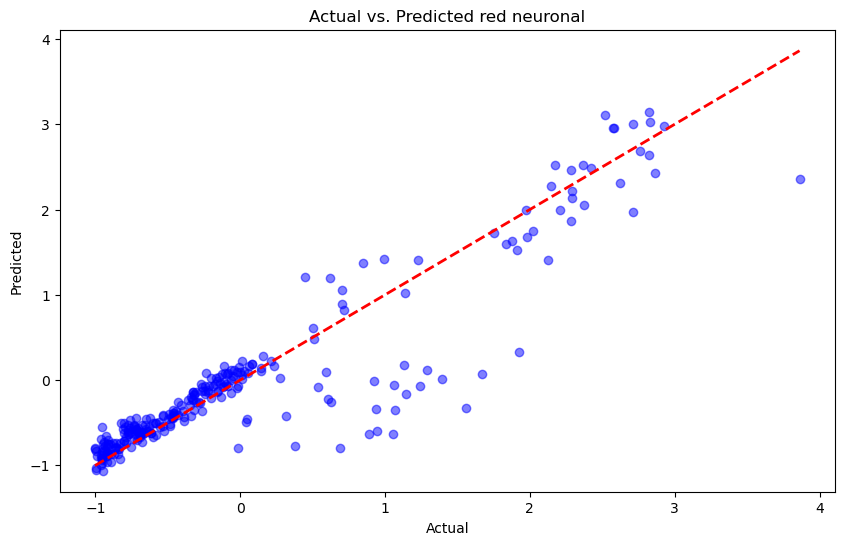

In [94]:
# Calculo de metricas del modelo y visualización del modelo de regresion
Y_pred_rna = model_rna.predict(X_test)

mae_rna = mean_absolute_error(Y_test, Y_pred_rna)
mse_rna = mean_squared_error(Y_test, Y_pred_rna)
rmse_rna = np.sqrt(mse_rna)
r2_rna = r2_score(Y_test, Y_pred_rna)

print(f"Mean Absolute Error: {mae_rna}")
print(f"Mean Squared Error: {mse_rna}")
print(f"Root Mean Squared Error: {rmse_rna}")
print(f"R-squared: {r2_rna}")

# Visualización de predicciones
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rna, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted red neuronal')
plt.show()

Mean Absolute Error: 0.22944369475431065
Mean Squared Error: 0.1657039592312484
Root Mean Squared Error: 0.4070675118837763
R-squared: 0.850657537489443


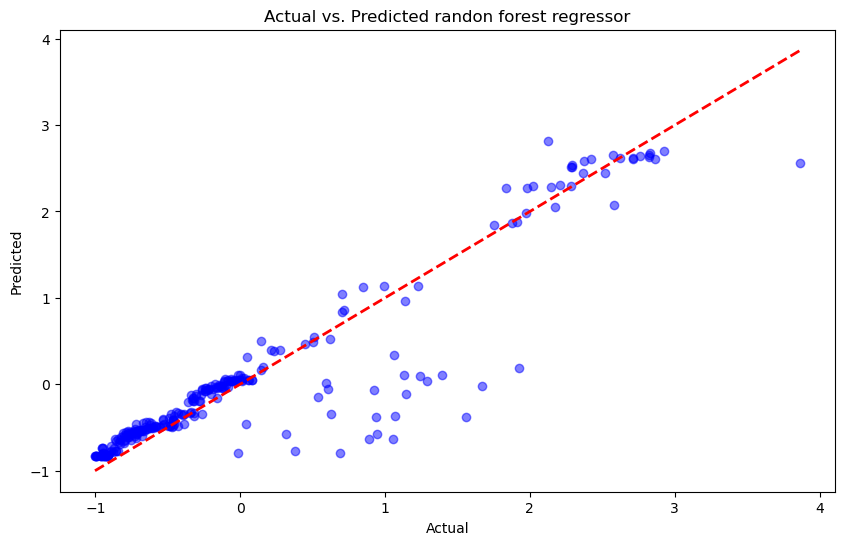

In [95]:
#Código para mostrar la evaluación de los modelos
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

# Visualización de predicciones
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rf, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted randon forest regressor')
plt.show()

In [96]:
#Código para mostrar la evaluación de los modelos
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

mae_rna = mean_absolute_error(Y_test, Y_pred_rna)
mse_rna = mean_squared_error(Y_test, Y_pred_rna)
rmse_rna = np.sqrt(mse_rna)
r2_rna = r2_score(Y_test, Y_pred_rna)

mstr = pd.DataFrame()
mstr['Mean Absolute Error'] = [mae_rna,mae_rf]
mstr['Mean Squared Error'] = [mse_rna,mse_rf]
mstr['Root Mean Squared Error'] = [rmse_rna,rmse_rf]
mstr['R-squared'] = [r2_rna,r2_rf]
print(mstr.transpose().rename(columns={0:'RNA',1:'RF'}))

                              RNA        RF
Mean Absolute Error      0.236265  0.229444
Mean Squared Error       0.176889  0.165704
Root Mean Squared Error  0.420582  0.407068
R-squared                0.840577  0.850658


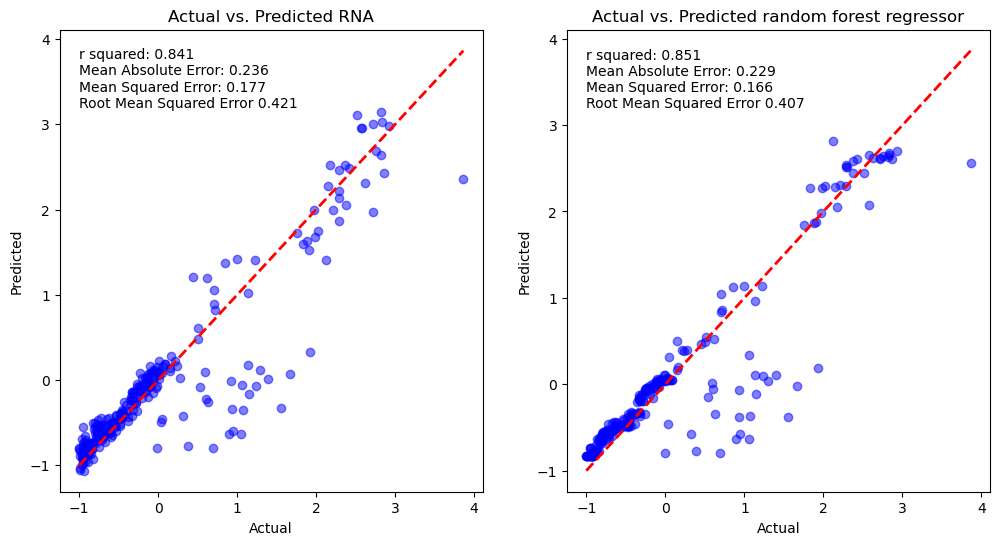

In [97]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
# Visualizar modelos
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[12,6])
ax1.scatter(Y_test, Y_pred_rna, color='blue', alpha=0.5)
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', lw=2,label=r2_rna)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Actual vs. Predicted RNA')
ax1.text(-1,3.2,f'r squared: {round(r2_rna,3)} \nMean Absolute Error: {round(mae_rna,3)} \nMean Squared Error: {round(mse_rna,3)} \nRoot Mean Squared Error {round(rmse_rna,3)}')

ax2.scatter(Y_test, Y_pred_rf, color='blue', alpha=0.5)
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', lw=2,label=r2_rf)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Actual vs. Predicted random forest regressor')
ax2.text(-1,3.2,f'r squared: {round(r2_rf,3)} \nMean Absolute Error: {round(mae_rf,3)} \nMean Squared Error: {round(mse_rf,3)} \nRoot Mean Squared Error {round(rmse_rf,3)}')

plt.show()

Construya un párrafo con los principales hallazgos.

* Ambos modelos tienen un coeficiente de determinación r2 similar (rf: 0.85 > rna: 0.841)
* Ambos modelos presentan un r2 superior al 0.75 por lo cual son modelos que se pueden desempeñar bien a la hora de ser usados como estimadores
* Ambos modelos tienen problemas para predecir los valores intermedios, esto se puede ver en el rango de valores estandarizados entre 0.5 y 2 los cuales se dispersan estos valores con respecto a la recta

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.

* El modelo de random forest regressor presenta un mayor coeficiente de determinación r2 0.851 en comparación al modelo de red neuronal 0.841 y ocurre un comportamiento similar en las métricas de error medio absoluto, error cuadrático medio (mse) y la raíz del error cuadrático medio (mse_rna: 0.177 y mse_rf: 0.166) donde se observa que el modelo de random forest regressor es menor.
* Ambos modelos presentan un r2 superior al 0.75 por lo cual son modelos que se pueden desempeñar bien a la hora de ser usados como estimadores
* Ambos modelos tienen problemas para predecir los valores intermedios, esto se puede ver en el rango de valores estandarizados entre 0.5 y 2, en este rango los puntos comienzan a estar más dispersos con respecto a la recta central

Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

* Un mayor número de datos perteneciente al rango de valores estándar 0.5 y 2 debido a que pueden existir pocos valores lo que provoca que el modelo no pueda ajustarse correctamente a esta región de valores.
* Optimización de hiperparametros.
* Mejorar la red con métodos de regularización
* Disminución de tiempo de entrenamiento teniendo en cuenta el punto de divergencia de las métricas de entrenamiento y validación.
